#### Step 1
1. Genrate 300 random variable x(i) in 0 to 1000
2. y(i) = 1 if 500 < x(i) < 800, else y(i) = 0.
3. write logistic regression and output predict result y1, svm output predict result y2.
4. draw x, y and x, y1 in one figure, and draw x, y and x,y2 in another.

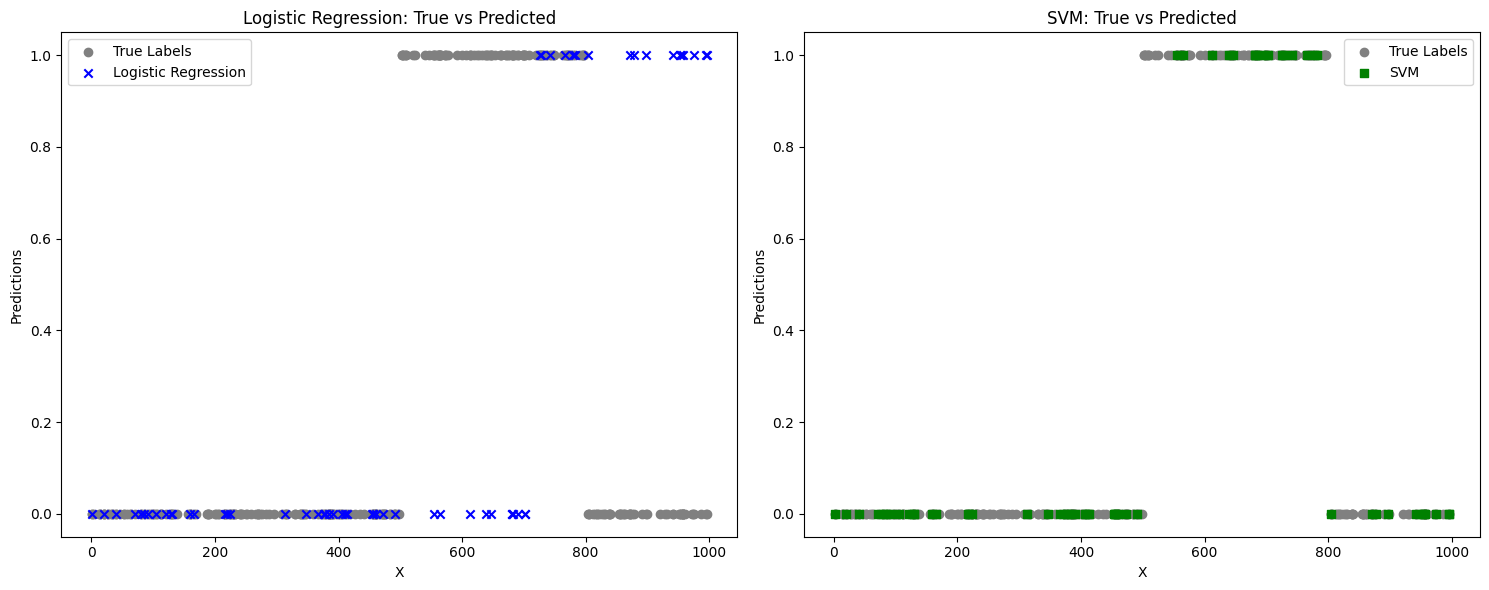

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Generate 300 random variables X(i) in the range [0, 1000]
np.random.seed(42)
X = np.random.randint(0, 1001, 300)

# Create binary classification labels Y(i)
y = np.where((X > 500) & (X < 800), 1, 0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

# Step 2: Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Step 3: Train SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Plotting the results in two separate figures
plt.figure(figsize=(15, 6))

# Figure 1: X, Y, and X, Y1
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='gray', label='True Labels')
plt.scatter(X_test, y_pred_logistic, color='blue', marker='x', label='Logistic Regression')
plt.xlabel('X')
plt.ylabel('Predictions')
plt.title('Logistic Regression: True vs Predicted')
plt.legend()

# Figure 2: X, Y, and X, Y2
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='gray', label='True Labels')
plt.scatter(X_test, y_pred_svm, color='green', marker='s', label='SVM')
plt.xlabel('X')
plt.ylabel('Predictions')
plt.title('SVM: True vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

#### Step 2.
add the decision hyperplane for each algorithm, please.

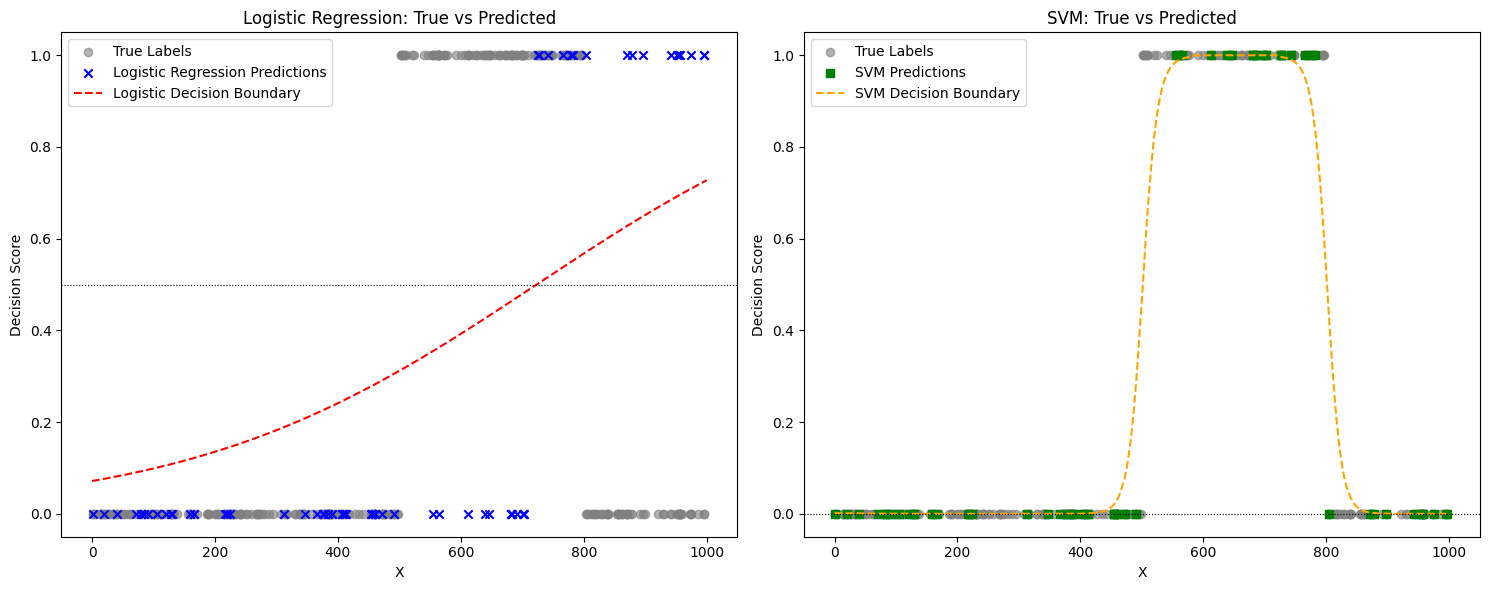

In [2]:
# Create a grid for plotting decision boundaries
X_grid = np.linspace(0, 1000, 300).reshape(-1, 1)

# Get decision boundary values
logistic_probs = logistic_model.predict_proba(X_grid)[:, 1]  # Probabilities for Logistic Regression
X_grid = np.linspace(0, 1000, 300).reshape(-1, 1)
svm_decision = svm_model.predict_proba(X_grid)[:, 1]     # Decision scores for SVM

# Plotting the results in two separate figures
plt.figure(figsize=(15, 6))

# Figure 1: X, Y, and Logistic Regression Decision Boundary
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='gray', label='True Labels', alpha=0.6)
plt.scatter(X_test, y_pred_logistic, color='blue', marker='x', label='Logistic Regression Predictions')
plt.plot(X_grid, logistic_probs, color='red', linestyle='--', label='Logistic Decision Boundary')
plt.axhline(0.5, color='black', linestyle=':', linewidth=0.8)  # Logistic threshold
plt.xlabel('X')
plt.ylabel('Decision Score')
plt.title('Logistic Regression: True vs Predicted')
plt.legend()

# Figure 2: X, Y, and SVM Decision Boundary
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='gray', label='True Labels', alpha=0.6)
plt.scatter(X_test, y_pred_svm, color='green', marker='s', label='SVM Predictions')
plt.plot(X_grid, svm_decision, color='orange', linestyle='--', label='SVM Decision Boundary')
plt.axhline(0, color='black', linestyle=':', linewidth=0.8)  # SVM threshold
plt.xlabel('X')
plt.ylabel('Decision Score')
plt.title('SVM: True vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()


#### Step 3.
1. Genrate 300 random variable x(i) in 0 to 1000
2. y(i) = 1 if 500 < x(i) < 800, else y(i) = 0.
3. write logistic regression and output predict result y1, svm output predict result y2.
4. draw x, y and x, y1 in one figure, and draw x, y and x,y2 in another.

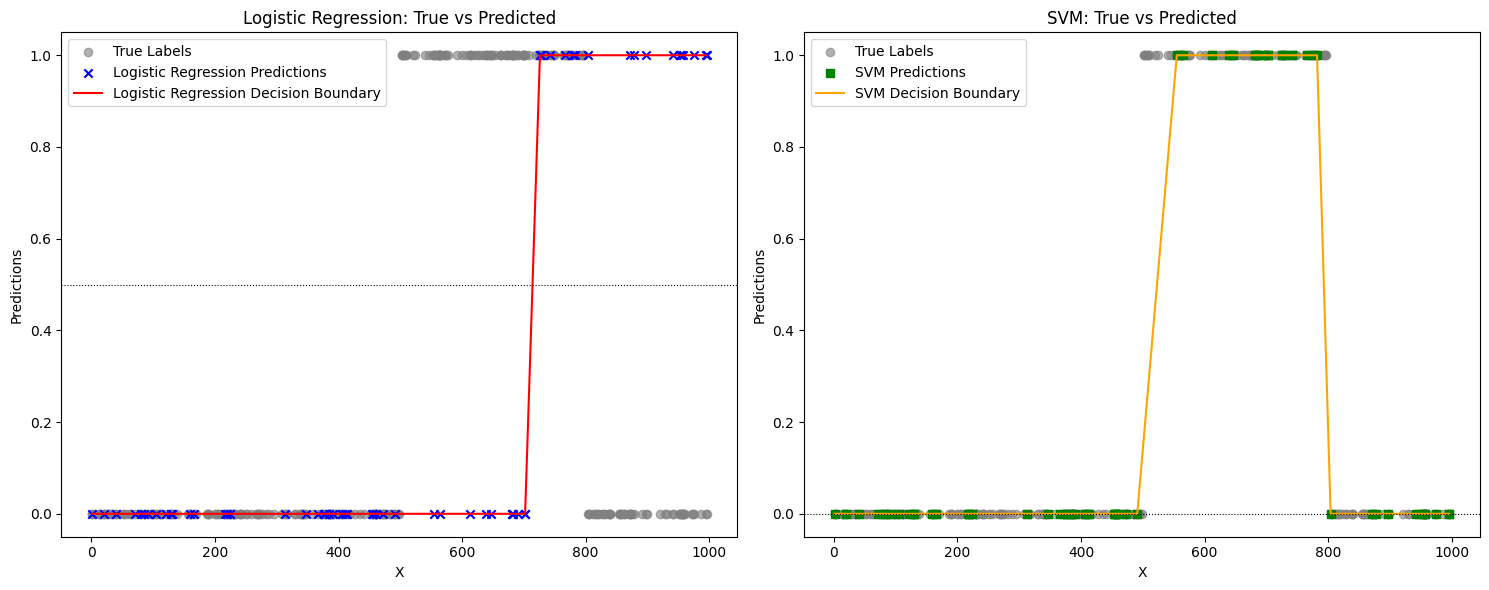

In [3]:
# Reorder the sequences by the value of X
sorted_idx = np.argsort(X.flatten())
X_sorted = X[sorted_idx]
y_sorted = y[sorted_idx]

sorted_idx = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_idx]
y_test_sorted = y_test[sorted_idx]
y_pred_logistic_sorted = y_pred_logistic[sorted_idx]
y_pred_svm_sorted = y_pred_svm[sorted_idx]

# Create a grid for plotting decision boundaries
X_grid = np.linspace(0, 1000, 300).reshape(-1, 1)

# Plotting the results
plt.figure(figsize=(15, 6))

# Plot y and y_pred_logistic with Logistic Regression predictions (green line)
plt.subplot(1, 2, 1)
plt.scatter(X_sorted, y_sorted, color='gray', label='True Labels', alpha=0.6)
plt.scatter(X_test_sorted, y_pred_logistic_sorted, color='blue', marker='x', label='Logistic Regression Predictions')
plt.plot(X_test_sorted, y_pred_logistic_sorted, color='red', label='Logistic Regression Decision Boundary')
plt.axhline(0.5, color='black', linestyle=':', linewidth=0.8)  # Logistic threshold
plt.xlabel('X')
plt.ylabel('Predictions')
plt.title('Logistic Regression: True vs Predicted')
plt.legend()

# Plot y and y_pred_svm with SVM predictions (red line)
plt.subplot(1, 2, 2)
plt.scatter(X_sorted, y_sorted, color='gray', label='True Labels', alpha=0.6)
plt.scatter(X_test_sorted, y_pred_svm_sorted, color='green', marker='s', label='SVM Predictions')
plt.plot(X_test_sorted, y_pred_svm_sorted, color='orange', label='SVM Decision Boundary')
plt.axhline(0, color='black', linestyle=':', linewidth=0.8)  # SVM threshold
plt.xlabel('X')
plt.ylabel('Predictions')
plt.title('SVM: True vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()
